# Recruit Restaurant Visitor Forecasting

## Contents
* Part1: Exploratory Data Analysis(EDA)
* Part2: Feature Engineering and Data Cleaning
* Part3: Predictive Modeling

## Part1: Exploratory Data Analysis(EDA)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recruit-restaurant-visitor-forecasting/air_reserve.csv.zip
/kaggle/input/recruit-restaurant-visitor-forecasting/hpg_store_info.csv.zip
/kaggle/input/recruit-restaurant-visitor-forecasting/hpg_reserve.csv.zip
/kaggle/input/recruit-restaurant-visitor-forecasting/sample_submission.csv.zip
/kaggle/input/recruit-restaurant-visitor-forecasting/air_visit_data.csv.zip
/kaggle/input/recruit-restaurant-visitor-forecasting/air_store_info.csv.zip
/kaggle/input/recruit-restaurant-visitor-forecasting/date_info.csv.zip
/kaggle/input/recruit-restaurant-visitor-forecasting/store_id_relation.csv.zip


In [2]:
#data load
air_reserve = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/air_reserve.csv.zip')
hpg_store_info = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/hpg_store_info.csv.zip')
hpg_reserve = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/hpg_reserve.csv.zip')
air_visit_data = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/air_visit_data.csv.zip')
air_store_info = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/air_store_info.csv.zip')
date_info = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/date_info.csv.zip')
store_id_relation = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/store_id_relation.csv.zip')
submission = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/sample_submission.csv.zip')
submission

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0
...,...,...
32014,air_fff68b929994bfbd_2017-05-27,0
32015,air_fff68b929994bfbd_2017-05-28,0
32016,air_fff68b929994bfbd_2017-05-29,0
32017,air_fff68b929994bfbd_2017-05-30,0


In [3]:
temp_list = [air_reserve, hpg_store_info, hpg_reserve, air_visit_data, air_store_info,
            date_info, store_id_relation]

# data info
for i in temp_list:
    i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92378 entries, 0 to 92377
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   air_store_id      92378 non-null  object
 1   visit_datetime    92378 non-null  object
 2   reserve_datetime  92378 non-null  object
 3   reserve_visitors  92378 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4690 entries, 0 to 4689
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hpg_store_id    4690 non-null   object 
 1   hpg_genre_name  4690 non-null   object 
 2   hpg_area_name   4690 non-null   object 
 3   latitude        4690 non-null   float64
 4   longitude       4690 non-null   float64
dtypes: float64(2), object(3)
memory usage: 183.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000320 entries, 0 to 2000319
Data column

In [4]:
#data check

print(air_reserve.shape)
air_reserve.head()

(92378, 4)


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [5]:
#air로 예약가능한 식당 수
air_reserve.air_store_id.nunique()

314

In [6]:
print(air_visit_data.shape)
print(air_visit_data.air_store_id.nunique())
air_visit_data.head()


(252108, 3)
829


,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


air_store_id: air에 등록된 restaurant의 id  
visit_date: 방문하기로 한 날짜  
visitors: 방문객 수  

In [7]:
# air_visits에 있는 식당ID가 모두 air_store_info에 있는가? 
air_visit_data.air_store_id.isin(air_store_info.air_store_id).all()

True

In [8]:
print(air_store_info.shape)
air_store_info.head()

(829, 5)


,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


air_genre_name: restaurnat의 장르  
air_area_name: 식당이 속한 도시의 이름  
latitude: 위도  
longitude: 경도

In [9]:
print(hpg_store_info.shape)
hpg_store_info.head()

(4690, 5)


,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


air_store_info와 같음.

In [10]:
print(hpg_reserve.shape)
hpg_reserve.head()

(2000320, 4)


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


hpg_store_id: restaurant의 hpg 아이디  
visit_datetime: 방문 날짜  
reserve_datetime: 예약 날짜  
reserve_visitors: 예약 인원

In [11]:
#hpg로 예약 가능한 식당 수
hpg_reserve.hpg_store_id.nunique()

13325

In [12]:
print(date_info.shape)
date_info.tail()

(517, 3)


,calendar_date,day_of_week,holiday_flg
512,2017-05-27,Saturday,0
513,2017-05-28,Sunday,0
514,2017-05-29,Monday,0
515,2017-05-30,Tuesday,0
516,2017-05-31,Wednesday,0


날짜를 요일로 구분, 공휴일은 'flag' 컬럼에 따로 분리

In [13]:
print(store_id_relation.shape)
store_id_relation.head()

(150, 2)


,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


주어진 데이터셋에는 위도(latitude)와 경도(longitude)가 포함돼 있습니다. 이를 지도에 시각화하여 분포도를 확인할 수 있습니다.

In [14]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

map = folium.Map(location = [39, 140], zoom_start=5) # 지도 생성

In [15]:
# air_store

list1=[]
list2=[]
marker_cluster = MarkerCluster().add_to(map)
for a in air_store_info.index:
    folium.Marker(location = [air_store_info.loc[a,"latitude"],air_store_info.loc[a,"longitude"]],
                  zoom_start=12).add_to(marker_cluster)
    list1.append(air_store_info.loc[a,"latitude"])
    list2.append(air_store_info.loc[a,"longitude"])

map

In [16]:
# hpg_store

list1=[]
list2=[]
marker_cluster = MarkerCluster().add_to(map)
for a in hpg_store_info.index:
    folium.Marker(location = [hpg_store_info.loc[a,"latitude"],hpg_store_info.loc[a,"longitude"]],
                  zoom_start=12).add_to(marker_cluster)
    list1.append(hpg_store_info.loc[a,"latitude"])
    list2.append(hpg_store_info.loc[a,"longitude"])
    
map

지도를 시각화 함으로써 얻은 정보는 다음과 같습니다.  
* air, hpg에 가입된 식당의 도시별 분포. (10개 정도로 추릴 수 있음.)
* air에 비해 hpg를 이용하는 사람의 수가 많다.
* 식당은 주요 도시와 거리에 밀집되있다.

In [17]:
air = pd.merge(air_reserve ,air_store_info, on='air_store_id')
hpg = pd.merge(hpg_reserve,hpg_store_info,on='hpg_store_id')
airrel = pd.merge(air, store_id_relation, how = 'left', on='air_store_id')
hpgrel = pd.merge(hpg, store_id_relation, how = 'left', on='hpg_store_id')
full = pd.merge(airrel, hpgrel, how='outer')
print("there are ",len(air)," restaurants with AIR and ",len(hpg)," with HPG.",len(store_id_relation),' have both.')

there are  92378  restaurants with AIR and  871308  with HPG. 150  have both.


In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(full[['longitude','latitude']])
full['cluster'] = kmeans.predict(full[['longitude','latitude']])

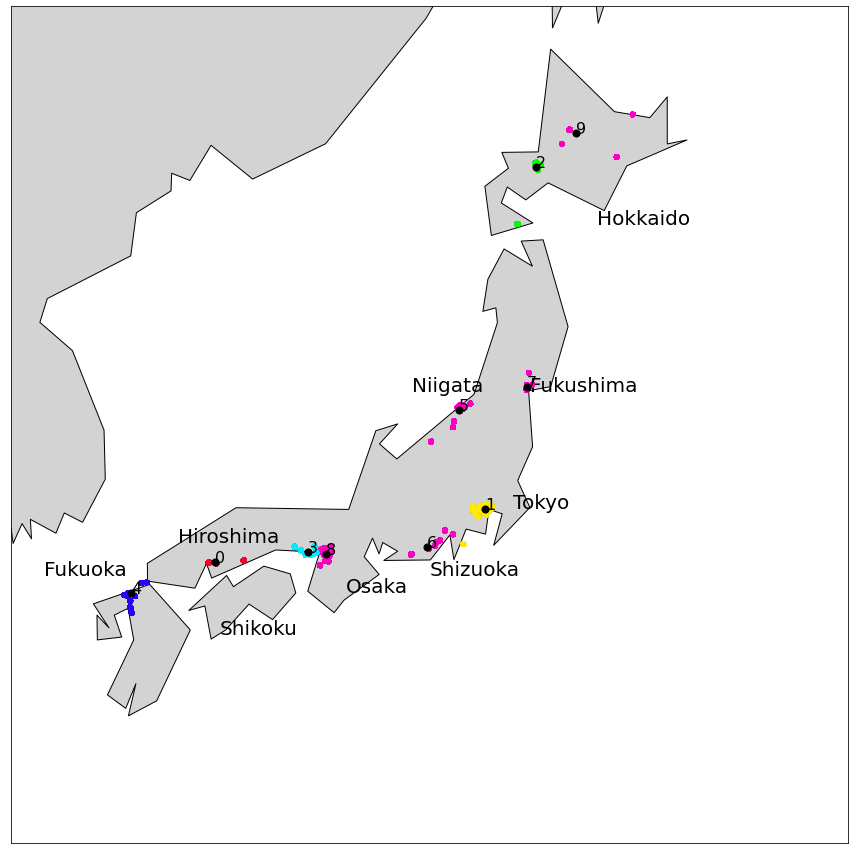

In [19]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
m = Basemap(projection='aeqd',width=2000000,height=2000000, lat_0=37.5, lon_0=138.2)

cx = [c[0] for c in kmeans.cluster_centers_]
cy = [c[1] for c in kmeans.cluster_centers_]
cm = plt.get_cmap('gist_rainbow')
colors = [cm(2.*i/10) for i in range(10)]
colored = [colors[k] for k in full['cluster']]
f,axa = plt.subplots(1,1,figsize=(15,16))
m.drawcoastlines()
m.fillcontinents(color='lightgray',lake_color='aqua',zorder=1)
m.scatter(full.longitude.values,full.latitude.values,color=colored,s=20,alpha=1,zorder=999,latlon=True)
m.scatter(cx,cy,color='Black',s=50,alpha=1,latlon=True,zorder=9999)
plt.setp(axa.get_yticklabels(), visible=True)
plt.annotate('Fukuoka', xy=(0.04, 0.32), xycoords='axes fraction',fontsize=20)
plt.annotate('Shikoku', xy=(0.25, 0.25), xycoords='axes fraction',fontsize=20)
plt.annotate('Hiroshima', xy=(0.2, 0.36), xycoords='axes fraction',fontsize=20)
plt.annotate('Osaka', xy=(0.40, 0.30), xycoords='axes fraction',fontsize=20)

plt.annotate('Tokyo', xy=(0.60, 0.4), xycoords='axes fraction',fontsize=20)
plt.annotate('Shizuoka', xy=(0.50, 0.32), xycoords='axes fraction',fontsize=20)
plt.annotate('Niigata', xy=(0.48, 0.54), xycoords='axes fraction',fontsize=20)
plt.annotate('Fukushima', xy=(0.62, 0.54), xycoords='axes fraction',fontsize=20)
plt.annotate('Hokkaido', xy=(0.7, 0.74), xycoords='axes fraction',fontsize=20)


for i in range(len(cx)):
    xpt,ypt = m(cx[i],cy[i])
    plt.annotate(i, (xpt+500,ypt+500),zorder=99999,fontsize=16)
plt.show()

Cluster 0 refers to Tokyo  
Cluster 1 refers to Osaka  
Cluster 2 refers to Sapporo  
Cluster 3 refers to Fukuoka  
Cluster 4 refers to Niigata  
Cluster 5 referst to Hiroshima  
Cluster 6 refers to Shizouku  
Cluster 7 refers to Sendai  
Cluster 9 refers to Kobe  

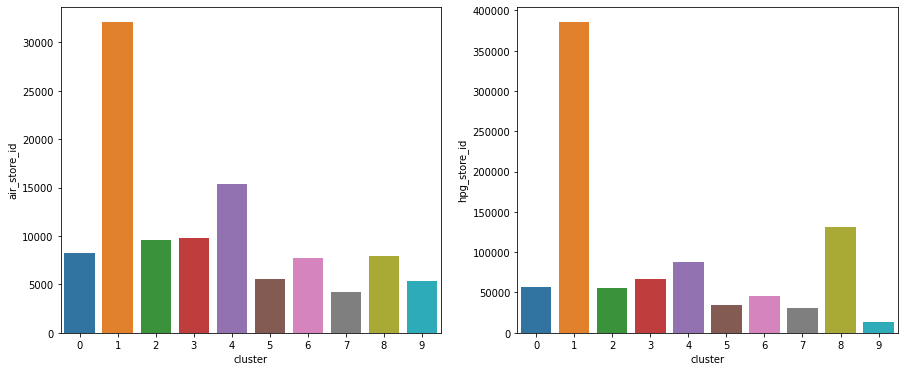

In [20]:
import seaborn as sns

f,axa = plt.subplots(1,2,figsize=(15,6))
hist_clust = full.groupby(['cluster'],as_index=False).count()
sns.barplot(x=hist_clust.cluster,y=hist_clust.air_store_id,ax=axa[0])
sns.barplot(x=hist_clust.cluster,y=hist_clust.hpg_store_id,ax=axa[1])
plt.show()

다음으로 방문객 수에 대해서 살펴보겠습니다.

In [21]:
air_visit_data

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6
...,...,...,...
252103,air_24e8414b9b07decb,2017-04-18,6
252104,air_24e8414b9b07decb,2017-04-19,6
252105,air_24e8414b9b07decb,2017-04-20,7
252106,air_24e8414b9b07decb,2017-04-21,8


In [22]:
visitors_by_date = air_visit_data.groupby('visit_date').sum()
visitors_by_date.head()

,visitors
visit_date,
2016-01-01,1033
2016-01-02,1764
2016-01-03,2368
2016-01-04,3326
2016-01-05,3927


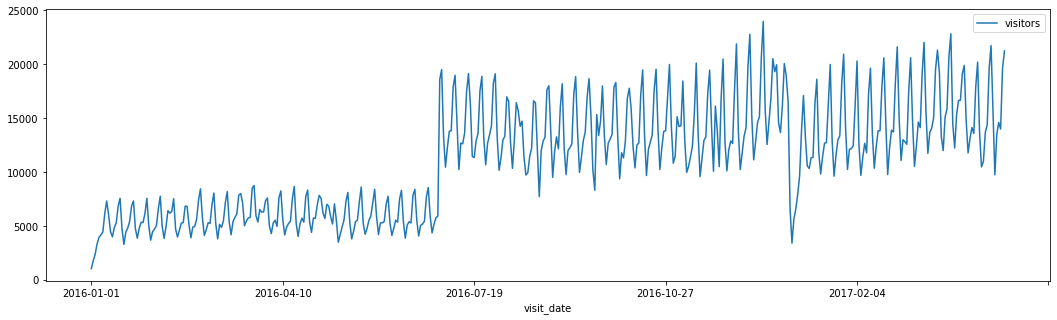

In [23]:
ax = visitors_by_date.plot(figsize=[18,5])

2016년 6월부터 2017년 2월까지의 그래프입니다.
* 2016년 7월 경에 이용객 수가 증가했다.
* 일주일 단위로 증감 패턴을 보인다.  
일주일간 이용객 수를 살펴보겠습니다.

In [24]:
air_reserve

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5
...,...,...,...,...
92373,air_db4b38ebe7a7ceff,2017-05-29 18:00:00,2017-04-17 19:00:00,6
92374,air_1033310359ceeac1,2017-05-30 23:00:00,2017-04-19 17:00:00,8
92375,air_877f79706adbfb06,2017-05-31 20:00:00,2017-04-12 23:00:00,3
92376,air_900d755ebd2f7bbd,2017-05-31 20:00:00,2017-04-19 16:00:00,10


In [25]:
air_visit_data['visit_date'] = pd.to_datetime(air_reserve.visit_datetime)
air_visit_data

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-01 19:00:00,25
1,air_ba937bf13d40fb24,2016-01-01 19:00:00,32
2,air_ba937bf13d40fb24,2016-01-01 19:00:00,29
3,air_ba937bf13d40fb24,2016-01-01 20:00:00,22
4,air_ba937bf13d40fb24,2016-01-01 20:00:00,6
...,...,...,...
252103,air_24e8414b9b07decb,NaT,6
252104,air_24e8414b9b07decb,NaT,6
252105,air_24e8414b9b07decb,NaT,7
252106,air_24e8414b9b07decb,NaT,8


In [26]:
air_visit_data['weekday'] = air_visit_data['visit_date'].dt.weekday
air_visit_data.head()

,air_store_id,visit_date,visitors,weekday
0,air_ba937bf13d40fb24,2016-01-01 19:00:00,25,4.0
1,air_ba937bf13d40fb24,2016-01-01 19:00:00,32,4.0
2,air_ba937bf13d40fb24,2016-01-01 19:00:00,29,4.0
3,air_ba937bf13d40fb24,2016-01-01 20:00:00,22,4.0
4,air_ba937bf13d40fb24,2016-01-01 20:00:00,6,4.0


Text(0.5, 0, 'Weekday (Monday=0, Sunday=6)')

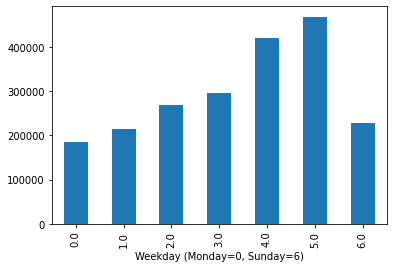

In [27]:
visitors_by_weekday = air_visit_data.groupby('weekday')['visitors'].sum()
ax = visitors_by_weekday.plot.bar()
ax.set_xlabel('Weekday (Monday=0, Sunday=6)')

일요일, 월요일은 고객의 수가 많지 않지만 점점 증가하여 토요일에 최대치를 찍습니다.  
즉, 휴일인지 아닌지에 따라서 방문자 수는 차이가 발생합니다.

In [28]:
date_info

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0
...,...,...,...
512,2017-05-27,Saturday,0
513,2017-05-28,Sunday,0
514,2017-05-29,Monday,0
515,2017-05-30,Tuesday,0


예측하려는 데이터는 air_store의 예상 방문객 수 입니다.  
사전 예약 수는 방문객 수와 밀접한 관련이 있기 때문에 이에 대해서 살펴 봐야합니다.

In [29]:
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [30]:
air_reserve.visit_datetime = pd.to_datetime(air_reserve.visit_datetime)

#### 방문 예약 시간대 그래프

<AxesSubplot:>

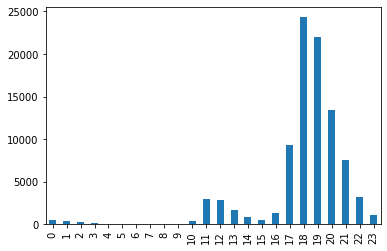

In [31]:
air_reserve.visit_datetime\
    .dt.hour\
    .value_counts()\
    .sort_index()\
    .plot.bar()

위 그래프를 통해 다음을 추측할 수 있습니다.
* 오전에는 예약이 거의 이루어지지 않는다. (밥을 먹기 수 시간 전에 예약이 이루어짐)
* 17 - 20시에 가장 많은 예약이 이루어진다.

#### 예약후 방문까지 걸리는 시간 그래프

In [32]:
import copy
df = copy.deepcopy(air_reserve)
df.reserve_datetime = pd.to_datetime(df.reserve_datetime)

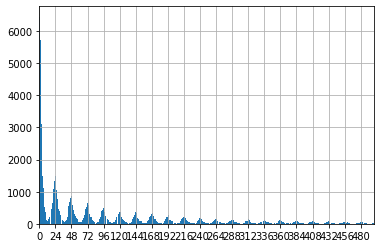

In [33]:
# 그래프 reserve, air_reserve 말고 카피떠서 그리기
df.reserve_datetime = pd.to_datetime(df.reserve_datetime)
df['reserve_ahead'] = df.visit_datetime - df.reserve_datetime
df['hours_ahead'] = df.reserve_ahead / pd.Timedelta('1 hour')
ax = df.hours_ahead.hist(bins=10000)
ax.set_xlim([0,500])
ax.set_xticks(np.arange(0, 500, 24))

시간 단위로 살펴 보면 더욱 명확합니다.  
사람들은 가까운 시일 내에 예약하는 경향을 보입니다.

## Part2: Feature Engineering and Data Cleaning

#### Submission파일형식에 기반한 훈련데이터구성

In [34]:
air_reserve = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/air_reserve.csv.zip')
hpg_store_info = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/hpg_store_info.csv.zip')
hpg_reserve = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/hpg_reserve.csv.zip')
air_visit_data = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/air_visit_data.csv.zip')
air_store_info = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/air_store_info.csv.zip')
date_info = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/date_info.csv.zip')
store_id_relation = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/store_id_relation.csv.zip')
submission = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/sample_submission.csv.zip')

In [35]:
#Target Store
print(submission.shape)
submission.head()

(32019, 2)


,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0


시계열 예측을 위해 데이터를 예측날짜(future), 그리고 과거시간(past)으로 분리할 것입니다. 이를 위해서는 air_visit_data와 submission 데이터셋의 형식을 맞춰 주어야 합니다.

방문 날짜에 따른 고객 수를 예측하기 위해 submission에서 날짜를 분리합니다.

In [36]:
#submission의 id -> air_store_id , date로 나눔 
id_split = submission['id'].str.split('_', expand=True)
id_split.columns = ['source', 'store_id', 'visit_date']
submission = pd.concat([submission, id_split], axis=1)
submission['air_store_id'] = submission['source'].str.cat(submission['store_id'], sep='_')
submission = submission[['id', 'air_store_id', 'visit_date', 'visitors']]
submission['visit_date'] = pd.to_datetime(submission['visit_date'])
submission

,id,air_store_id,visit_date,visitors
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27,0
...,...,...,...,...
32014,air_fff68b929994bfbd_2017-05-27,air_fff68b929994bfbd,2017-05-27,0
32015,air_fff68b929994bfbd_2017-05-28,air_fff68b929994bfbd,2017-05-28,0
32016,air_fff68b929994bfbd_2017-05-29,air_fff68b929994bfbd,2017-05-29,0
32017,air_fff68b929994bfbd_2017-05-30,air_fff68b929994bfbd,2017-05-30,0


In [37]:
#submission파일의 air_store_id 고유값수
submission.air_store_id.nunique()

821

In [38]:
# air_visit에 'id'열만들기(submission동일형식)
air_visit_data['id'] = air_visit_data['air_store_id'].str.cat(air_visit_data['visit_date'].astype(str), sep='_')
air_visit_data

,air_store_id,visit_date,visitors,id
0,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13
1,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14
2,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15
3,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16
4,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18
...,...,...,...,...
252103,air_24e8414b9b07decb,2017-04-18,6,air_24e8414b9b07decb_2017-04-18
252104,air_24e8414b9b07decb,2017-04-19,6,air_24e8414b9b07decb_2017-04-19
252105,air_24e8414b9b07decb,2017-04-20,7,air_24e8414b9b07decb_2017-04-20
252106,air_24e8414b9b07decb,2017-04-21,8,air_24e8414b9b07decb_2017-04-21


air_visit_data와 submission 파일의 id 형식을 동일하게 만들어줍니다.

In [39]:
full = pd.concat([air_visit_data, submission],axis=0, keys=['past','future'], names=['dataset']).reset_index(level='dataset').reset_index(drop=True)
full1=copy.deepcopy(full)
full

,dataset,air_store_id,visit_date,visitors,id
0,past,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13
1,past,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14
2,past,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15
3,past,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16
4,past,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18
...,...,...,...,...,...
284122,future,air_fff68b929994bfbd,2017-05-27 00:00:00,0,air_fff68b929994bfbd_2017-05-27
284123,future,air_fff68b929994bfbd,2017-05-28 00:00:00,0,air_fff68b929994bfbd_2017-05-28
284124,future,air_fff68b929994bfbd,2017-05-29 00:00:00,0,air_fff68b929994bfbd_2017-05-29
284125,future,air_fff68b929994bfbd,2017-05-30 00:00:00,0,air_fff68b929994bfbd_2017-05-30


#### stores_info 데이터 병합 
방문객 수는 air_store 그리고 hpg_store을 통해 예약한 사람의 숫자와 연관이 있습니다. 따라서 이 둘을 함께 고려할 수 있도록 데이터셋을 합쳐줍니다.

In [40]:
# air_store_info기준으로 hpg_store_id추가(병합)
# 예측/훈련데이터에서 air_store_id가 중심임. 
stores = pd.merge(air_store_info, store_id_relation, how='left', on='air_store_id')
print(stores.shape)
stores.head()

(829, 6)


,air_store_id,air_genre_name,air_area_name,latitude,longitude,hpg_store_id
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,hpg_9b38b9e13da6da27
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN


In [41]:
# stores에 hpg_store_id가 없는 비율 
stores['hpg_store_id'].isnull().mean()

0.8190591073582629

In [42]:
# stores 완성
stores = pd.merge(stores, hpg_store_info, how='left', on='hpg_store_id', suffixes=['_air', '_hpg'])
#How many stores found no information in the hpg_store table?
stores.hpg_genre_name.isnull().mean()

0.9240048250904704

In [43]:
stores1=copy.deepcopy(stores)
stores1

,air_store_id,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN,NaN,NaN,NaN,NaN
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,hpg_9b38b9e13da6da27,NaN,NaN,NaN,NaN
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN,NaN,NaN,NaN,NaN
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN,NaN,NaN,NaN,NaN
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
824,air_9bf595ef095572fb,International cuisine,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051,NaN,NaN,NaN,NaN,NaN
825,air_764f71040a413d4d,Asian,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051,NaN,NaN,NaN,NaN,NaN
826,air_10bbe8acd943d8f6,Asian,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051,NaN,NaN,NaN,NaN,NaN
827,air_7514d90009613cd6,Karaoke/Party,Hokkaidō Sapporo-shi Minami 3 Jōnishi,43.055460,141.340956,hpg_08def9f764fcca4c,Party,Hokkaidō Sapporo-shi Minami 4 Jōnishi,43.055047,141.353236


#### reserve 데이터 병합 

In [44]:
# air_reserve와 hpg_reserve 병합 
hpg_reserve = pd.merge(hpg_reserve, store_id_relation, on='hpg_store_id')[air_reserve.columns]
reserves = pd.concat([air_reserve, hpg_reserve], axis=0)
reserves1=copy.deepcopy(reserves)
print(reserves.shape)
reserves.head()

(120561, 4)


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


#### 방문날짜시간별 통계

In [45]:
air_visit_data.visit_date = pd.to_datetime(air_visit_data.visit_date)
print(air_visit_data.head())
visitors_by_date = air_visit_data.groupby('visit_date').sum()
visitors_by_date.head()

           air_store_id visit_date  visitors                               id
0  air_ba937bf13d40fb24 2016-01-13        25  air_ba937bf13d40fb24_2016-01-13
1  air_ba937bf13d40fb24 2016-01-14        32  air_ba937bf13d40fb24_2016-01-14
2  air_ba937bf13d40fb24 2016-01-15        29  air_ba937bf13d40fb24_2016-01-15
3  air_ba937bf13d40fb24 2016-01-16        22  air_ba937bf13d40fb24_2016-01-16
4  air_ba937bf13d40fb24 2016-01-18         6  air_ba937bf13d40fb24_2016-01-18


,visitors
visit_date,
2016-01-01,1033
2016-01-02,1764
2016-01-03,2368
2016-01-04,3326
2016-01-05,3927


In [46]:
# 날짜관련 피쳐 추출
full.visit_date=pd.to_datetime(full.visit_date)
print(full.info())
full['weekday'] = full.visit_date.dt.dayofweek
full['year'] = full.visit_date.dt.year
full['month'] = full.visit_date.dt.month
full['day_of_year'] = full.visit_date.dt.dayofyear
full['days_in_month'] = full.visit_date.dt.days_in_month
full['week_of_year'] = full.visit_date.dt.weekofyear
full['is_month_end'] = full.visit_date.dt.is_month_end
full.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284127 entries, 0 to 284126
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   dataset       284127 non-null  object        
 1   air_store_id  284127 non-null  object        
 2   visit_date    284127 non-null  datetime64[ns]
 3   visitors      284127 non-null  int64         
 4   id            284127 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 10.8+ MB
None


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


,dataset,air_store_id,visit_date,visitors,id,weekday,year,month,day_of_year,days_in_month,week_of_year,is_month_end
0,past,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13,2,2016,1,13,31,2,False
1,past,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14,3,2016,1,14,31,2,False
2,past,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15,4,2016,1,15,31,2,False
3,past,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16,5,2016,1,16,31,2,False
4,past,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18,0,2016,1,18,31,3,False


앞에서 살펴 보았듯이 휴일 전날에는 고객이 증가하고 평일 전날에는 고객이 감소합니다. 따라서 년, 월, 주 카테고리로 피처를 분할해 주었으며 휴일 전후를 의미하는 피처를 추가해 줍니다.

In [47]:
# 2016이후 방문날짜기간 
print(full.visit_date.min())
first_day = pd.to_datetime('2016-01-01')
full['days_since_20160101'] = (full.visit_date - first_day).apply(lambda dt: dt.days)

2016-01-01 00:00:00


In [48]:
# 휴일관련 피쳐 추가 
date_info.calendar_date = pd.to_datetime(date_info.calendar_date)
holiday_info = date_info
holiday_info['tomorrow_is_holiday'] = holiday_info.holiday_flg.shift(-1).fillna(0).astype(int)
holiday_info['yesterday_is_holiday'] = holiday_info.holiday_flg.shift(1).fillna(0).astype(int)
holiday_info.head()

,calendar_date,day_of_week,holiday_flg,tomorrow_is_holiday,yesterday_is_holiday
0,2016-01-01,Friday,1,1,0
1,2016-01-02,Saturday,1,1,1
2,2016-01-03,Sunday,1,0,1
3,2016-01-04,Monday,0,0,1
4,2016-01-05,Tuesday,0,0,0


In [49]:
# full에 휴일관련 피쳐 추가 
full = pd.merge(left=full, 
                right=holiday_info.drop('day_of_week', axis=1), 
                how='left', 
                left_on='visit_date', right_on='calendar_date')\
        .drop('calendar_date', axis=1)
full.head()

,dataset,air_store_id,visit_date,visitors,id,weekday,year,month,day_of_year,days_in_month,week_of_year,is_month_end,days_since_20160101,holiday_flg,tomorrow_is_holiday,yesterday_is_holiday
0,past,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13,2,2016,1,13,31,2,False,12,0,0,0
1,past,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14,3,2016,1,14,31,2,False,13,0,0,0
2,past,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15,4,2016,1,15,31,2,False,14,0,0,0
3,past,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16,5,2016,1,16,31,2,False,15,0,0,0
4,past,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18,0,2016,1,18,31,3,False,17,0,0,0


#### Location관련 피쳐 추출
지리적 특성 세분화  
Todofuken은 일본의 광역 자치단체인 도, 부, 현 등을 묶어 지칭하는 용어입니다. 이를 중심으로 도시와 거리(street)을 분할하는 피처를 생성해 줍니다.
시, 도, 거리를 기준으로 피처 분할

In [50]:
# area_name관련 데이터 처리 
area_split = stores.air_area_name.str.split(' ', expand=True)
print(area_split[2])
stores['Todofuken'] = area_split[0]
stores['city'] = area_split[1]
stores['street'] = area_split.iloc[:, 2:].apply(lambda row: ' '.join(row.dropna()), axis=1)
stores.head()

0      Kumoidōri
1      Kumoidōri
2      Kumoidōri
3      Kumoidōri
4      Shibakōen
         ...    
824      Shibuya
825      Shibuya
826      Shibuya
827       Minami
828       Minami
Name: 2, Length: 829, dtype: object


,air_store_id,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,Todofuken,city,street
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN,NaN,NaN,NaN,NaN,Hyōgo-ken,Kōbe-shi,Kumoidōri
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,hpg_9b38b9e13da6da27,NaN,NaN,NaN,NaN,Hyōgo-ken,Kōbe-shi,Kumoidōri
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN,NaN,NaN,NaN,NaN,Hyōgo-ken,Kōbe-shi,Kumoidōri
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN,NaN,NaN,NaN,NaN,Hyōgo-ken,Kōbe-shi,Kumoidōri
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen


map을 통해 살펴본 것과 같이 각 가게들은 특정한 도시를 중심으로 모여있습니다. 따라서 한 가게가 속한 도시에 식당이 얼마나 있는지 나타내는 피처를 추가했습니다.

In [51]:
# 동일지역 상점수 계산
n_stores_by_street = stores.groupby(['air_area_name']).size().to_frame(name='n_stores_same_street').reset_index()
n_stores_by_city = stores.groupby(['Todofuken', 'city']).size().to_frame(name='n_stores_same_city').reset_index()
n_stores_by_Todofuken = stores.groupby('Todofuken').size().to_frame(name='n_stores_same_Todofuken').reset_index()
print(n_stores_by_street.head())
print(n_stores_by_city.head())
print(n_stores_by_Todofuken)

                           air_area_name  n_stores_same_street
0         Fukuoka-ken Fukuoka-shi Daimyō                    64
1  Fukuoka-ken Fukuoka-shi Hakata Ekimae                    16
2       Fukuoka-ken Fukuoka-shi Imaizumi                     2
3        Fukuoka-ken Fukuoka-shi Momochi                     6
4       Fukuoka-ken Fukuoka-shi Shiobaru                     7
     Todofuken            city  n_stores_same_city
0  Fukuoka-ken     Fukuoka-shi                 103
1  Fukuoka-ken    Itoshima-shi                   7
2  Fukuoka-ken  Kitakyūshū-shi                   9
3  Fukuoka-ken      Kurume-shi                   6
4  Fukuoka-ken        Yame-shi                   2
       Todofuken  n_stores_same_Todofuken
0    Fukuoka-ken                      127
1  Hiroshima-ken                       32
2       Hokkaidō                       46
3      Hyōgo-ken                       57
4     Miyagi-ken                       17
5    Niigata-ken                       14
6   Shizuoka-ken      

In [52]:
# stores에 동일지역 상점수 피쳐추가 
stores = pd.merge(left=stores, right=n_stores_by_street, how='left', on='air_area_name')
stores = pd.merge(left=stores, right=n_stores_by_city, how='left', on=['Todofuken', 'city'])
stores = pd.merge(left=stores, right=n_stores_by_Todofuken, how='left', on='Todofuken')
stores.head()

,air_store_id,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,Todofuken,city,street,n_stores_same_street,n_stores_same_city,n_stores_same_Todofuken
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN,NaN,NaN,NaN,NaN,Hyōgo-ken,Kōbe-shi,Kumoidōri,17,25,57
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,hpg_9b38b9e13da6da27,NaN,NaN,NaN,NaN,Hyōgo-ken,Kōbe-shi,Kumoidōri,17,25,57
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN,NaN,NaN,NaN,NaN,Hyōgo-ken,Kōbe-shi,Kumoidōri,17,25,57
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN,NaN,NaN,NaN,NaN,Hyōgo-ken,Kōbe-shi,Kumoidōri,17,25,57
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444


### 훈련데이터(full) 완성 
주 별 싸이클, 주말, 공휴일 등 다양한 날짜별 특성에 따라서 예약률과 방문 빈도는 변합니다.
full dataset은 이러한 요소들이 학습에 잘 반영될 수 있도록 feature engineering을 진행했습니다.

각 도시의 인구 밀집도, 그리고 여기에 위치한 가게의 수 별로 예약과 방문 빈도가 달라질 수 있습니다.
stores dataset은 이런 요소들을 고려하여 feature enineering을 진행했습니다.
이 둘을 합쳐줍니다.

In [53]:
# full와 stores 합침
full = pd.merge(left=full, right=stores, how='left', on='air_store_id')
full.head()

,dataset,air_store_id,visit_date,visitors,id,weekday,year,month,day_of_year,days_in_month,...,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,Todofuken,city,street,n_stores_same_street,n_stores_same_city,n_stores_same_Todofuken
0,past,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13,2,2016,1,13,31,...,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444
1,past,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14,3,2016,1,14,31,...,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444
2,past,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15,4,2016,1,15,31,...,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444
3,past,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16,5,2016,1,16,31,...,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444
4,past,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18,0,2016,1,18,31,...,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444


#### reserves 관련 피쳐추출

In [54]:
# reserves 피쳐추가
reserves.visit_datetime = pd.to_datetime(reserves.visit_datetime)
print(reserves.head())
reserves['planned_visit_date'] = reserves.visit_datetime.dt.date.astype('datetime64[ns]')
reserves['reserve_datetime'] = pd.to_datetime(reserves.reserve_datetime)
reserves['reserve_date'] = reserves.reserve_datetime.dt.date
reserves['reserve_ahead'] = reserves.visit_datetime - reserves.reserve_datetime.astype('datetime64[ns]')
reserves['hours_ahead'] = reserves.reserve_ahead / pd.Timedelta('1 hour')
reserves['days_ahead'] = reserves.reserve_ahead.apply(lambda delta_t: delta_t.days)
display(reserves.head())
display(reserves.info())

           air_store_id      visit_datetime     reserve_datetime  \
0  air_877f79706adbfb06 2016-01-01 19:00:00  2016-01-01 16:00:00   
1  air_db4b38ebe7a7ceff 2016-01-01 19:00:00  2016-01-01 19:00:00   
2  air_db4b38ebe7a7ceff 2016-01-01 19:00:00  2016-01-01 19:00:00   
3  air_877f79706adbfb06 2016-01-01 20:00:00  2016-01-01 16:00:00   
4  air_db80363d35f10926 2016-01-01 20:00:00  2016-01-01 01:00:00   

   reserve_visitors  
0                 1  
1                 3  
2                 6  
3                 2  
4                 5  


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,planned_visit_date,reserve_date,reserve_ahead,hours_ahead,days_ahead
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,2016-01-01,2016-01-01,0 days 03:00:00,3.0,0
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,2016-01-01,2016-01-01,0 days 00:00:00,0.0,0
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,2016-01-01,2016-01-01,0 days 00:00:00,0.0,0
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,2016-01-01,2016-01-01,0 days 04:00:00,4.0,0
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,2016-01-01,2016-01-01,0 days 19:00:00,19.0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 120561 entries, 0 to 28182
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   air_store_id        120561 non-null  object         
 1   visit_datetime      120561 non-null  datetime64[ns] 
 2   reserve_datetime    120561 non-null  datetime64[ns] 
 3   reserve_visitors    120561 non-null  int64          
 4   planned_visit_date  120561 non-null  datetime64[ns] 
 5   reserve_date        120561 non-null  object         
 6   reserve_ahead       120561 non-null  timedelta64[ns]
 7   hours_ahead         120561 non-null  float64        
 8   days_ahead          120561 non-null  int64          
dtypes: datetime64[ns](3), float64(1), int64(2), object(2), timedelta64[ns](1)
memory usage: 9.2+ MB


None

예약은 고객의 방문 예측에 큰 영향을 미칩니다. 앞에서 확인했듯이 예약은 특정한 패턴을 가지고 있습니다.

예약에 관한 정보를 나타내는 데이터 셋을 만들어줍니다.

In [55]:
# reserves 관련 통계 추출 
reserve_summary = reserves.groupby(['air_store_id', 'planned_visit_date'])['reserve_visitors', 'hours_ahead'].agg({'reserve_visitors': ['count','sum'], 'hours_ahead': 'mean'}).reset_index()
reserve_summary.columns=['air_store_id', 'planned_visit_date','n_reserves', 'n_reserve_visitors', 'reserve_avg_hours_ahead']
reserve_summary.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,air_store_id,planned_visit_date,n_reserves,n_reserve_visitors,reserve_avg_hours_ahead
0,air_00a91d42b08b08d9,2016-01-14,1,2,77.0
1,air_00a91d42b08b08d9,2016-01-15,1,4,142.0
2,air_00a91d42b08b08d9,2016-01-16,1,2,70.0
3,air_00a91d42b08b08d9,2016-01-22,1,2,82.0
4,air_00a91d42b08b08d9,2016-01-29,1,5,144.0


#### full dataset에 reserve dateset 병합

In [56]:
full = pd.merge(left=full, right=reserve_summary, how='left', left_on=['air_store_id', 'visit_date'], right_on=['air_store_id', 'planned_visit_date'])
full3 = copy.deepcopy(full)
full.head()

,dataset,air_store_id,visit_date,visitors,id,weekday,year,month,day_of_year,days_in_month,...,Todofuken,city,street,n_stores_same_street,n_stores_same_city,n_stores_same_Todofuken,planned_visit_date,n_reserves,n_reserve_visitors,reserve_avg_hours_ahead
0,past,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13,2,2016,1,13,31,...,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaT,NaN,NaN,NaN
1,past,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14,3,2016,1,14,31,...,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaT,NaN,NaN,NaN
2,past,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15,4,2016,1,15,31,...,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaT,NaN,NaN,NaN
3,past,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16,5,2016,1,16,31,...,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaT,NaN,NaN,NaN
4,past,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18,0,2016,1,18,31,...,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaT,NaN,NaN,NaN


#### 날짜, 가계 등을 이용한 피쳐 추출

In [57]:
def catStrFeatures(df, colname1, colname2, sep='_'):
    series = df[colname1].astype(str).str.cat(df[colname2].astype(str), sep=sep)
    return series

In [58]:
full['area_genre'] = catStrFeatures(full, 'air_area_name', 'air_genre_name')
full['store_weekday'] = catStrFeatures(full, 'air_store_id', 'weekday')
full['store_weekday_holiday'] = catStrFeatures(full, 'store_weekday', 'holiday_flg')

In [59]:
full.head()

,dataset,air_store_id,visit_date,visitors,id,weekday,year,month,day_of_year,days_in_month,...,n_stores_same_street,n_stores_same_city,n_stores_same_Todofuken,planned_visit_date,n_reserves,n_reserve_visitors,reserve_avg_hours_ahead,area_genre,store_weekday,store_weekday_holiday
0,past,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13,2,2016,1,13,31,...,51,61,444,NaT,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_ba937bf13d40fb24_2,air_ba937bf13d40fb24_2_0
1,past,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14,3,2016,1,14,31,...,51,61,444,NaT,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_ba937bf13d40fb24_3,air_ba937bf13d40fb24_3_0
2,past,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15,4,2016,1,15,31,...,51,61,444,NaT,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_ba937bf13d40fb24_4,air_ba937bf13d40fb24_4_0
3,past,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16,5,2016,1,16,31,...,51,61,444,NaT,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_ba937bf13d40fb24_5,air_ba937bf13d40fb24_5_0
4,past,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18,0,2016,1,18,31,...,51,61,444,NaT,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_ba937bf13d40fb24_0,air_ba937bf13d40fb24_0_0


In [60]:
# '가계/요일/휴일'에 따른 방문자수 통계(평균,중간,최소,최대)
# 주말과 공휴일 등에 따른 평균, 최대, 최소 고객 수 피처를 추가해줍니다.
group_by_cols = ['air_store_id', 'weekday', 'holiday_flg']
visitor_stats = full.query('dataset == "past"').groupby(group_by_cols)['visitors'].agg(['mean', 'median', 'min', 'max']).rename(columns=lambda colname: str(colname)+'_visitors').reset_index()
visitor_stats

,air_store_id,weekday,holiday_flg,mean_visitors,median_visitors,min_visitors,max_visitors
0,air_00a91d42b08b08d9,0,0,22.500000,19.0,1,47
1,air_00a91d42b08b08d9,0,1,21.000000,21.0,21,21
2,air_00a91d42b08b08d9,1,0,24.350000,24.5,1,43
3,air_00a91d42b08b08d9,2,0,28.125000,28.0,15,52
4,air_00a91d42b08b08d9,3,0,29.868421,30.0,15,47
...,...,...,...,...,...,...,...
10456,air_fff68b929994bfbd,4,0,5.658537,5.0,1,17
10457,air_fff68b929994bfbd,4,1,5.000000,5.0,1,9
10458,air_fff68b929994bfbd,5,0,7.435897,7.0,2,18
10459,air_fff68b929994bfbd,5,1,7.500000,7.5,5,10


#### full dataset에 방문자 통계 추가

In [61]:
full = full.merge(visitor_stats, how='left', on=group_by_cols)
full4 = copy.deepcopy(full)
full.head()

,dataset,air_store_id,visit_date,visitors,id,weekday,year,month,day_of_year,days_in_month,...,n_reserves,n_reserve_visitors,reserve_avg_hours_ahead,area_genre,store_weekday,store_weekday_holiday,mean_visitors,median_visitors,min_visitors,max_visitors
0,past,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13,2,2016,1,13,31,...,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_ba937bf13d40fb24_2,air_ba937bf13d40fb24_2_0,24.095238,25.0,7.0,57.0
1,past,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14,3,2016,1,14,31,...,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_ba937bf13d40fb24_3,air_ba937bf13d40fb24_3_0,20.450000,21.0,7.0,45.0
2,past,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15,4,2016,1,15,31,...,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_ba937bf13d40fb24_4,air_ba937bf13d40fb24_4_0,35.218750,35.5,17.0,61.0
3,past,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16,5,2016,1,16,31,...,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_ba937bf13d40fb24_5,air_ba937bf13d40fb24_5_0,27.828125,27.0,6.0,53.0
4,past,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18,0,2016,1,18,31,...,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_ba937bf13d40fb24_0,air_ba937bf13d40fb24_0_0,13.754386,12.0,2.0,34.0


Reformat Features

In [62]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284127 entries, 0 to 284126
Data columns (total 42 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   dataset                  284127 non-null  object        
 1   air_store_id             284127 non-null  object        
 2   visit_date               284127 non-null  datetime64[ns]
 3   visitors                 284127 non-null  int64         
 4   id                       284127 non-null  object        
 5   weekday                  284127 non-null  int64         
 6   year                     284127 non-null  int64         
 7   month                    284127 non-null  int64         
 8   day_of_year              284127 non-null  int64         
 9   days_in_month            284127 non-null  int64         
 10  week_of_year             284127 non-null  int64         
 11  is_month_end             284127 non-null  bool          
 12  days_since_20160

In [63]:
full.columns

Index(['dataset', 'air_store_id', 'visit_date', 'visitors', 'id', 'weekday',
       'year', 'month', 'day_of_year', 'days_in_month', 'week_of_year',
       'is_month_end', 'days_since_20160101', 'holiday_flg',
       'tomorrow_is_holiday', 'yesterday_is_holiday', 'air_genre_name',
       'air_area_name', 'latitude_air', 'longitude_air', 'hpg_store_id',
       'hpg_genre_name', 'hpg_area_name', 'latitude_hpg', 'longitude_hpg',
       'Todofuken', 'city', 'street', 'n_stores_same_street',
       'n_stores_same_city', 'n_stores_same_Todofuken', 'planned_visit_date',
       'n_reserves', 'n_reserve_visitors', 'reserve_avg_hours_ahead',
       'area_genre', 'store_weekday', 'store_weekday_holiday', 'mean_visitors',
       'median_visitors', 'min_visitors', 'max_visitors'],
      dtype='object')

#### 훈련용데이터(full)의 type별컬럼 정리 
Categorical, binary, numeric 컬럼을 나눠줍니다.

In [64]:
# Types of features (cat, num, etc.)
# categorical columns
cat_cols = ['air_store_id', 'air_genre_name', 'air_area_name', 
            'hpg_genre_name', 'hpg_area_name',
            'Todofuken', 'city', 'street', 
            'area_genre', 'store_weekday', 'store_weekday_holiday'
           ]

# binary columns (T/F or 1/0)
bin_cols = ['is_month_end', 'holiday_flg', 'tomorrow_is_holiday', 'yesterday_is_holiday']

# numeric columns
num_cols = ['weekday', 'year', 'month', 'day_of_year', 'days_in_month', 'week_of_year', 'days_since_20160101', # date
            'latitude_air', 'longitude_air',   # location
            'n_stores_same_street', 'n_stores_same_city', 'n_stores_same_Todofuken',    # neighbor
            'n_reserves', 'n_reserve_visitors', 'reserve_avg_hours_ahead',  # reserves
            'mean_visitors', 'median_visitors', 'min_visitors', 'max_visitors'    # simple aggregation of visitors
           ]    

# id columns
id_col = 'id'

# target column
target_col = 'visitors'

Categorical Features(범주형데이터)를 수치형 데이터로 변환합니다. feature 이름은 기존 컬럼명 + '_int'입니다.

In [65]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
cat2int_cols = [ cat+'_int' for cat in cat_cols ]    
# a list of column names (strings) 
# to keep track of all columns turned from categorical to integer
cat2int_encoders = {}
for cat, cat2int in zip(cat_cols, cat2int_cols):
    encoder = LabelEncoder()
    full[cat2int] = encoder.fit_transform(full[cat].astype(str))
    cat2int_encoders[cat] = encoder ###

full[cat2int_cols].head()

,air_store_id_int,air_genre_name_int,air_area_name_int,hpg_genre_name_int,hpg_area_name_int,Todofuken_int,city_int,street_int,area_genre_int,store_weekday_int,store_weekday_holiday_int
0,603,4,62,16,31,7,29,77,144,4222,7860
1,603,4,62,16,31,7,29,77,144,4223,7862
2,603,4,62,16,31,7,29,77,144,4224,7864
3,603,4,62,16,31,7,29,77,144,4225,7866
4,603,4,62,16,31,7,29,77,144,4220,7858


Category가 숫자로 구분된다면 학습 시 노이즈(대소관계 등)가 생길 수 있습니다. 따라서 One-hot encoding을 진행합니다.

In [66]:
# One-hot Encoding 
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=True)
cat2onehot_sparse = onehot_encoder.fit_transform(full[cat2int_cols])

In [67]:
print(type(cat2onehot_sparse))
print(len(cat_cols))
cat2onehot_sparse.shape

<class 'scipy.sparse.csr.csr_matrix'>
11


(284127, 18026)

In [68]:
# OneHot인코딩이름 (카테고리이름_is_세부이름)
cat2onehot_cols = [ cat+'__is__'+str(level).replace(' ', '_') for cat in cat_cols for level in cat2int_encoders[cat].classes_]
import random
random.sample(cat2onehot_cols, 20)
# [cat_cols, num_cols, bin_cols, id_col, target_col, cat2int_cols, cat2int_encoders, cat2onehot_cols, cat2onehot_sparse]

['store_weekday_holiday__is__air_9d452a881f7f2bb7_1_1',
 'store_weekday__is__air_629d9935273c82ae_5',
 'store_weekday_holiday__is__air_0867f7bebad6a649_1_0',
 'store_weekday__is__air_57ed725a1930a5b9_5',
 'store_weekday_holiday__is__air_5acc13d655a6e8b2_0_1',
 'store_weekday__is__air_1d3f797dd1f7cf1c_6',
 'store_weekday__is__air_7514d90009613cd6_3',
 'store_weekday__is__air_15ae33469e9ea2dd_3',
 'store_weekday_holiday__is__air_2cee51fa6fdf6c0d_2_0',
 'store_weekday_holiday__is__air_9d3482b4680aee88_6_1',
 'store_weekday__is__air_258ad2619d7bff9a_2',
 'store_weekday__is__air_d6b3e67261f07646_2',
 'store_weekday_holiday__is__air_876d7a23c47811cb_2_0',
 'store_weekday_holiday__is__air_382f5ace4e2247b8_4_1',
 'store_weekday_holiday__is__air_0b1e72d2d4422b20_4_1',
 'store_weekday_holiday__is__air_f2c5a1f24279c531_1_0',
 'store_weekday_holiday__is__air_138ff410757b845f_4_1',
 'store_weekday__is__air_16179d43b6ee5fd8_6',
 'store_weekday_holiday__is__air_bb26d6d079594414_6_0',
 'street__is__Ka

In [69]:
print(full.shape)
print(full.info())
full.head()

(284127, 53)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 284127 entries, 0 to 284126
Data columns (total 53 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   dataset                    284127 non-null  object        
 1   air_store_id               284127 non-null  object        
 2   visit_date                 284127 non-null  datetime64[ns]
 3   visitors                   284127 non-null  int64         
 4   id                         284127 non-null  object        
 5   weekday                    284127 non-null  int64         
 6   year                       284127 non-null  int64         
 7   month                      284127 non-null  int64         
 8   day_of_year                284127 non-null  int64         
 9   days_in_month              284127 non-null  int64         
 10  week_of_year               284127 non-null  int64         
 11  is_month_end               284127 non-n

,dataset,air_store_id,visit_date,visitors,id,weekday,year,month,day_of_year,days_in_month,...,air_genre_name_int,air_area_name_int,hpg_genre_name_int,hpg_area_name_int,Todofuken_int,city_int,street_int,area_genre_int,store_weekday_int,store_weekday_holiday_int
0,past,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13,2,2016,1,13,31,...,4,62,16,31,7,29,77,144,4222,7860
1,past,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14,3,2016,1,14,31,...,4,62,16,31,7,29,77,144,4223,7862
2,past,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15,4,2016,1,15,31,...,4,62,16,31,7,29,77,144,4224,7864
3,past,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16,5,2016,1,16,31,...,4,62,16,31,7,29,77,144,4225,7866
4,past,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18,0,2016,1,18,31,...,4,62,16,31,7,29,77,144,4220,7858


## Part3: Predictive Modeling

#### * Train/Test Data set 준비

In [70]:
# 사용 컬럼 선택
use_cols = num_cols + bin_cols + cat2int_cols
print(use_cols)
print(len(use_cols))

['weekday', 'year', 'month', 'day_of_year', 'days_in_month', 'week_of_year', 'days_since_20160101', 'latitude_air', 'longitude_air', 'n_stores_same_street', 'n_stores_same_city', 'n_stores_same_Todofuken', 'n_reserves', 'n_reserve_visitors', 'reserve_avg_hours_ahead', 'mean_visitors', 'median_visitors', 'min_visitors', 'max_visitors', 'is_month_end', 'holiday_flg', 'tomorrow_is_holiday', 'yesterday_is_holiday', 'air_store_id_int', 'air_genre_name_int', 'air_area_name_int', 'hpg_genre_name_int', 'hpg_area_name_int', 'Todofuken_int', 'city_int', 'street_int', 'area_genre_int', 'store_weekday_int', 'store_weekday_holiday_int']
34


훈련데이터와 테스트데이터 분리 

In [71]:
# 데이터 정규화
print(full.shape)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_scaler = ['n_stores_same_street', 'n_stores_same_city', 'n_stores_same_Todofuken', 'n_reserves', 'n_reserve_visitors', 'reserve_avg_hours_ahead', 'mean_visitors', 'median_visitors', 'min_visitors', 'max_visitors', 'day_of_year', 'days_in_month', 'week_of_year', 'days_since_20160101']
full1 = full[cols_scaler]
scaler.fit(full1)
full1_minMaxScaled = scaler.transform(full1)
data1 = np.array(full1_minMaxScaled)
df1 = pd.DataFrame(data1, columns=cols_scaler)
full = full.drop(cols_scaler, axis=1)
full = pd.concat([full,df1],axis=1)
full.shape

(284127, 53)


(284127, 53)

In [72]:
# past / future 분리를 수행합니다. 타임라인에 따라서 학습이 진행되기에 past는 train, future은 test입니다.
past = full.query('dataset=="past"')
future  = full.query('dataset=="future"')
print('Past data set:')
display(past.shape)
#display(past.head())
print('Future data set:')
display(future.shape)
#display(future.head())

Past data set:


(252108, 53)

Future data set:


(32019, 53)

In [73]:
# past/future기간 확인 
print(past.visit_date.min())
print(past.visit_date.max())
print(future.visit_date.min())
print(future.visit_date.max())

2016-01-01 00:00:00
2017-04-22 00:00:00
2017-04-23 00:00:00
2017-05-31 00:00:00


In [74]:
# train셋/val셋 데이터 나눔 
train_selector = past.visit_date < '2017-02-01'
X_train = past[train_selector][use_cols]
y_train = past[train_selector][target_col].apply(np.log1p)

#test와 별개로 학습이 올바르게 수행되는지 측정할 수 있도록 validation을 진행합니다.
val_selector = past.visit_date >= '2017-02-01'
X_val = past[val_selector][use_cols]
y_val = past[val_selector][target_col].apply(np.log1p)

X_test = future[use_cols]
#y_test = future[target_col]

Xtrain = past[use_cols]
ytrain = past[target_col].apply(np.log1p)

print('- 전체Xtrain:', Xtrain.shape)
print('- 전체ytrain:', ytrain.shape)
print('- X_train:', X_train.shape)
print('- y_train:', y_train.shape)
print('- X_val:', X_val.shape)
print('- y_val:', y_val.shape)
print('- X_test:', X_test.shape)
#print('- y_test:', y_test.shape)
print(X_train.shape[0]/(X_train.shape[0]+X_val.shape[0]))

- 전체Xtrain: (252108, 34)
- 전체ytrain: (252108,)
- X_train: (194235, 34)
- y_train: (194235,)
- X_val: (57873, 34)
- y_val: (57873,)
- X_test: (32019, 34)
0.770443619401209


target 값의 분포가 한 쪽으로 쏠려 있으면 학습이 제대로 수행되지 못할 수 있습니다. 따라서 log 변환을 통해 정규화를 진행합니다.

<AxesSubplot:>

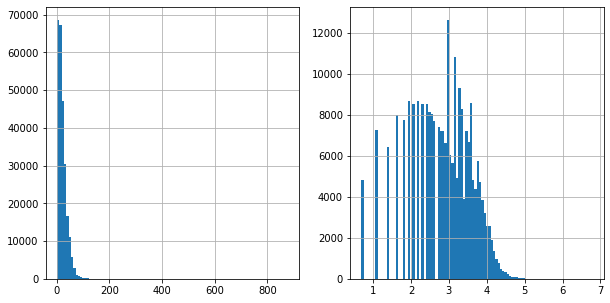

In [75]:
# target값(visitors)에 log변환 해줘야 하는 이유
fg, ax = plt.subplots(nrows=1, ncols=2, figsize=[10,5])
past[target_col].hist(bins=100, ax=ax[0])
past[target_col].apply(np.log1p).hist(bins=100, ax=ax[1])

#### 결측치 처리

<AxesSubplot:>

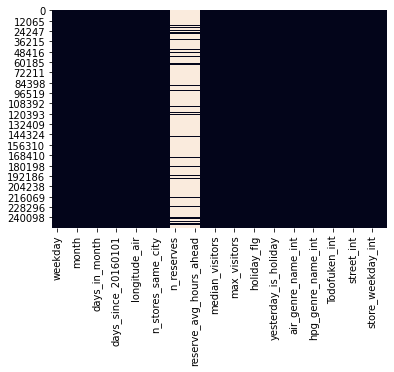

In [76]:
#결측치 시각화
import seaborn as sns 
import matplotlib.pyplot as plt
#print(X_train.isnull().sum())
%matplotlib inline
sns.heatmap(X_train.isnull(),cbar=False)

In [77]:
# 결측치 처리
col_nan= use_cols

for i in col_nan:
    X_train.loc[:,i] = X_train.loc[:,i].fillna(0.0)
    Xtrain.loc[:,i] = Xtrain.loc[:,i].fillna(0.0)
    X_test.loc[:,i] = X_test.loc[:,i].fillna(0.0)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


### 모델 학습

In [85]:
# 모델별 학습
# X_train, y_train, X_val, y_val, X_test, y_test

# #RandomForestRegressor 
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor()
# model.fit(Xtrain, ytrain)

# # # XGBRegressor 
# from xgboost import XGBRegressor
# model = XGBRegressor() #learning_rate = 0.1
# model.fit(Xtrain, ytrain)

# #LGBM 
# from lightgbm import LGBMRegressor
# model = LGBMRegressor()
# model.fit(Xtrain, ytrain)

# # Ridge 
# from sklearn.linear_model import Ridge
# model = Ridge(alpha = 14) #:alpha높을수록 Regularization높아서계수0
# model.fit(Xtrain, ytrain)

# Catboost
from catboost import CatBoostRegressor
model = CatBoostRegressor() #learning_rate=0.05
model.fit(Xtrain, ytrain, verbose=False)

# # LinearRegression
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(Xtrain, ytrain)

In [86]:
# submission 제출
y_pred = model.predict(X_test)
y_pred = np.expm1(y_pred)
y_pred =np.clip(y_pred, a_min=2, a_max=None)
submission = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/sample_submission.csv.zip')
submission['visitors'] = y_pred.astype(int)
submission.to_csv("sub_3.csv", index = 0)

In [80]:
# # 파라미터 튜닝
# from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
# # from lightgbm import LGBMRegressor
# # model = LGBMRegressor()
# for i in range(5,10,5):
#         model = CatBoostRegressor(learning_rate = i*0.01) 
# #         model = XGBRegressor(learning_rate = i*0.01)
#         model.fit(Xtrain, ytrain, verbose=False)
#         y_pred = model.predict(X_test)
#         y_pred = np.expm1(y_pred)
#         y_pred =np.clip(y_pred, a_min=1, a_max=None)
#         submission = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/sample_submission.csv.zip')
#         submission['visitors'] = y_pred.astype(int)
#         submission
#         submission.to_csv(f"scaler_cat_lr_{i}.csv", index = 0) 

In [87]:
submission.head()

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,2
1,air_00a91d42b08b08d9_2017-04-24,19
2,air_00a91d42b08b08d9_2017-04-25,23
3,air_00a91d42b08b08d9_2017-04-26,28
4,air_00a91d42b08b08d9_2017-04-27,31


In [82]:
# 참고
# 코드 및 시각화. Feature engineering과 모델링 등 각 단계에 따라서 정리가 잘 돼있었습니다.  
# https://github.com/ligz08/Kaggle-Recruit-Restaurant-Visitor-Forecasting/blob/master/README.md  

# 시각화 쪽으로 도움을 받았으며 정규화를 왜 하는지, 각 피처들의 상관관계는 어떤지 등을 참고했습니다.  
# https://www.kaggle.com/headsortails/be-my-guest-recruit-restaurant-eda  

# 일부 코드를 참조했으며 피처를 분리하는 기준(지역, 날짜 등)에 관한 인사이트를 얻을 수 있었습니다.  
# https://www.kaggle.com/asindico/a-japanese-journey  